### 미니 프로젝트

1. 전기차
2. 자율주행
3. 전동화

* 내 주제 : 전기차

# Depth

1. 전기차가 왜 1등 키워드일까? 이유가 뭘까? => 이러이러한 트렌드 때문에 전기차가 유행이구나!
2. 그럼 에스엘에서는 이러이러한 트렌드에서 어떤 위치일까?
3. 앞으로 에스엘이 나아가야하는 방향?

In [ ]:
import pandas as pd
from collections import Counter
import re

# ============================================
# 1) CSV 불러오기
# ============================================
df = pd.read_csv("danawa_news_titles.csv")
titles = df["제목"].dropna().tolist()   # 혹시 빈값 있으면 제거

print("제목 개수:", len(titles))

# ============================================
# 2) 제목을 하나의 문자열로 합치기
# ============================================
all_text = " ".join(titles)

# 특수문자 제거 (한글/영문/숫자/공백만 남기기)
clean_text = re.sub(r"[^0-9A-Za-z가-힣\s]", " ", all_text)

# 단어 분리
tokens = clean_text.split()

# ============================================
# 3) 불용어(stopwords) 제거 + 길이 2 이상 단어만
# ============================================
stopwords = [ "공개", "출시", "현대차", "기아", "판매", "2024", "2025", "시장", "자동차",
    "개최", "생산", "SUV", "모델", "국내", "글로벌", "모빌리티", "최초", "개발",
    "증가", "서비스", "브랜드", "영상", "실시", "세계", "기술", "위한",
    "현대차그룹", "공장", "강화", "진행", "최대", "체결", "신형", "공식",
    "트렌드", "시승기", "고객", "2025년", "확대", "디자인", "신차", "차량",
    "2024년", "수상", "캠페인", "발표", "오픈", "개시", "에디션", "차세대",
    "돌파", "선정", "지원", "감소", "미래", "협력", "공급", "기념", "신규",
    "새로운", "1위", "가격", "목표", "프로모션", "대상", "연속", "전략", "주행", "달성", "기록", "전환", "최고", "전망", "만에",
    "후원", "기반", "성료", "참가", "시작", "계획", "공략", "가장", "위해",
    "올해의", "전용", "성장", "부문", "추가", "2023년", "특별", "대비",
    "예고", "이벤트", "점유율", "2026년", "프리미엄", "도입", "구매",
    "예정", "진출", "프로그램", "전시", "상반기", "부분변경", "제공",
    "콘셉트", "안전", "실적", "ID", "우승", "확장", "한정", "모집",
    "구축", "1분기", "칼럼", "혜택", "공동", "올해", "중단", "번째",
    "박차", "시즌", "경쟁", "온라인", "양산", "적용" ]
words = [w for w in tokens if len(w) >= 2 and w not in stopwords]

# ============================================
# 4) 단어 빈도수 세기
# ============================================
counter = Counter(words)
top_word = counter.most_common()

# ============================================
# 5) DataFrame으로 변환
# ============================================
df_keywords = pd.DataFrame(top_word, columns=["단어", "빈도"])

print("\n🔍 키워드 TOP WORD")
display(df_keywords)

df_keywords.to_csv('result.csv', index=False)       ## 불용어를 제거한 keyword들만 csv 파일로 저장해서 한 번 확인

제목 개수: 18886

🔍 키워드 TOP WORD


,단어,빈도
0,전기차,2111
1,중국,1408
2,테슬라,889
3,BMW,877
4,EV,731
...,...,...
27251,동안의,1
27252,23일부터,1
27253,26일까지,1
27254,8개국,1


([0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14],
 [Text(0, 0, '전기차'),
  Text(1, 0, '중국'),
  Text(2, 0, '테슬라'),
  Text(3, 0, 'BMW'),
  Text(4, 0, 'EV'),
  Text(5, 0, '배터리'),
  Text(6, 0, '전기'),
  Text(7, 0, '미국'),
  Text(8, 0, '벤츠'),
  Text(9, 0, '코리아'),
  Text(10, 0, 'BYD'),
  Text(11, 0, '폭스바겐'),
  Text(12, 0, '메르세데스'),
  Text(13, 0, '유럽'),
  Text(14, 0, '한국타이어')])

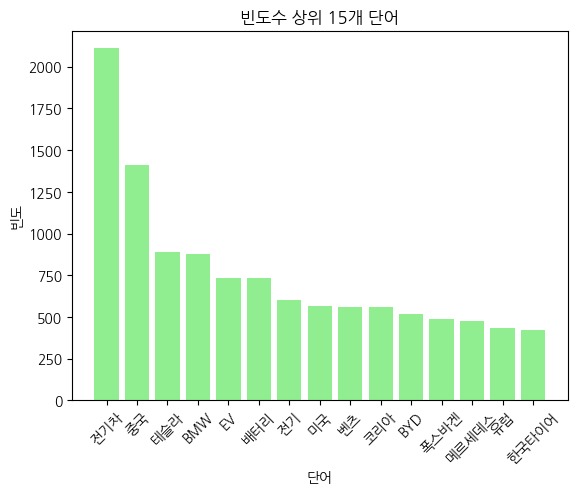

In [ ]:
## 상위 15개만 막대그래프로 표현하기
import matplotlib.pyplot as plt
import koreanize_matplotlib

top15 = counter.most_common(15)
df_top15 = pd.DataFrame(top15, columns=["단어", "빈도"])

plt.bar(df_top15['단어'], df_top15['빈도'], color='lightgreen')
plt.title('빈도수 상위 15개 단어')
plt.xlabel('단어')
plt.ylabel('빈도')
plt.xticks(rotation=45)

In [ ]:
# ============================================
# 6) '전기차' 또는 '전기'가 들어가는 제목만 골라서 키워드 분석
# ============================================

# 6-1) 전기차 관련 제목만 필터링
ev_titles = [t for t in titles if ("전기차" in str(t)) or ("전기" in str(t))]
print("전기차/전기 관련 제목 개수:", len(ev_titles))

# 6-2) 제목들을 하나의 문자열로 합치기
ev_text = " ".join(ev_titles)

# 특수문자 제거
ev_clean = re.sub(r"[^0-9A-Za-z가-힣\s]", " ", ev_text)

# 단어 분리
ev_tokens = ev_clean.split()

# 6-3) 불용어 + (원하면) 전기 관련 단어도 제외 가능
# 필요하면 extra_stop에 ["전기차", "전기", "EV"] 이런 식으로 넣어서 빼면 됨
extra_stop = []   # 예: ["전기차", "전기", "EV"]
ev_words = [
    w for w in ev_tokens
    if len(w) >= 2 and w not in stopwords and w not in extra_stop
]

# 6-4) 전기차 관련 제목 안에서 단어 빈도 세기
ev_counter = Counter(ev_words)
ev_top30 = ev_counter.most_common(30)

df_ev_keywords = pd.DataFrame(ev_top30, columns=["단어", "빈도"])

print("\n전기차/전기 관련 제목 안에서의 키워드 TOP 30")
display(df_ev_keywords)

# df_ev_keywords.to_csv("result_ev_keywords.csv", index=False, encoding="utf-8")


전기차/전기 관련 제목 개수: 3162

전기차/전기 관련 제목 안에서의 키워드 TOP 30


,단어,빈도
0,전기차,2111
1,전기,604
2,중국,315
3,배터리,260
4,EV,219
5,BYD,164
6,미국,142
7,유럽,139
8,테슬라,117
9,폭스바겐,116


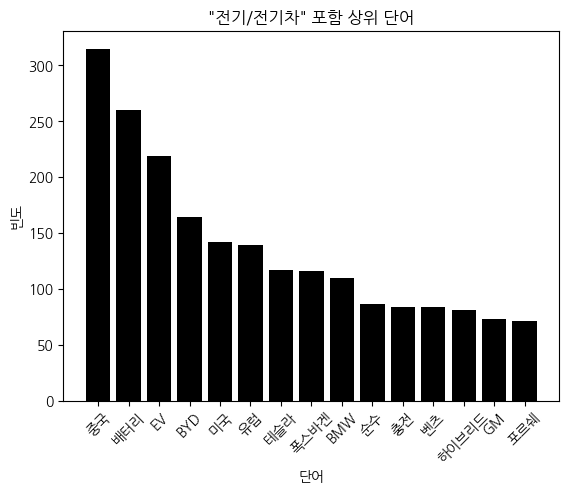

In [25]:
exclude_words = ["전기차", "전기"]

df_top15_wo_ev = df_top15[~df_top15["단어"].isin(exclude_words)]

plt.bar(df_top15_wo_ev['단어'], df_top15_wo_ev['빈도'], color='black')
plt.title('"전기/전기차" 포함 상위 단어')
plt.xlabel('단어')
plt.ylabel('빈도')
plt.xticks(rotation=45)
plt.show()

### 전기, 나라, 메이커 관련된 것들은 그렇다 싶은데 => 중국은 왜 이렇게 높고, 배터리는 왜 이렇게 높을까?

In [7]:
# ============================================
# 중국 관련 제목만 필터링
# ============================================
china_titles = [t for t in titles if "중국" in str(t)]

print("중국 관련 제목 개수:", len(china_titles))

# 단어 분석
china_text = " ".join(china_titles)
china_clean = re.sub(r"[^0-9A-Za-z가-힣\s]", " ", china_text)
china_tokens = china_clean.split()

china_words = [
    w for w in china_tokens 
    if len(w) >= 2 and w not in stopwords
]

china_counter = Counter(china_words)
china_top10 = china_counter.most_common(10)

df_china = pd.DataFrame(china_top10, columns=["단어", "빈도"])
print("\n중국 관련 키워드 Top10")
display(df_china)


중국 관련 제목 개수: 1723

중국 관련 키워드 Top10


,단어,빈도
0,중국,1408
1,전기차,327
2,BYD,168
3,배터리,134
4,중국산,108
5,신에너지차,104
6,테슬라,97
7,유럽,72
8,관세,66
9,자율주행,63


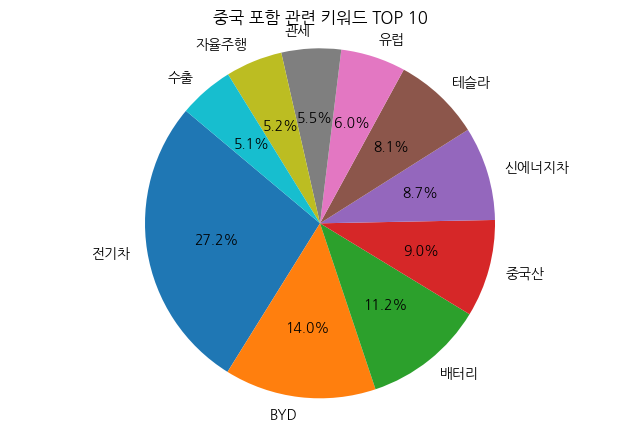

In [30]:
# ============================================
# (1) 중국 제외한 단어들만 다시 Counter 생성
# ============================================

exclude = {"중국"}   # 제거할 단어

china_words_wo = [w for w in china_words if w not in exclude]
china_counter_wo = Counter(china_words_wo)

# TOP10 추출
china_top10_wo = china_counter_wo.most_common(10)

df_china_wo = pd.DataFrame(china_top10_wo, columns=["단어", "빈도"])

# ============================================
# (2) 파이차트 그리기
# ============================================

plt.figure(figsize=(8, 5))
plt.pie(
    df_china_wo["빈도"],
    labels=df_china_wo["단어"],
    autopct="%.1f%%",
    startangle=140
)
plt.title("중국 포함 관련 키워드 TOP 10")
plt.axis("equal")
plt.show()

In [8]:
# ============================================
# 배터리 관련 제목만 필터링
# ============================================
battery_titles = [t for t in titles if "배터리" in str(t)]

print("배터리 관련 제목 개수:", len(battery_titles))

battery_text = " ".join(battery_titles)
battery_clean = re.sub(r"[^0-9A-Za-z가-힣\s]", " ", battery_text)
battery_tokens = battery_clean.split()

battery_words = [
    w for w in battery_tokens 
    if len(w) >= 2 and w not in stopwords
]

battery_counter = Counter(battery_words)
battery_top10 = battery_counter.most_common(10)

df_battery = pd.DataFrame(battery_top10, columns=["단어", "빈도"])
print("\n배터리 관련 키워드 Top10")
display(df_battery)


배터리 관련 제목 개수: 793

배터리 관련 키워드 Top10


,단어,빈도
0,배터리,731
1,전기차,241
2,중국,130
3,전고체,81
4,EV,65
5,CATL,61
6,미국,43
7,탑재,40
8,LFP,39
9,BYD,34


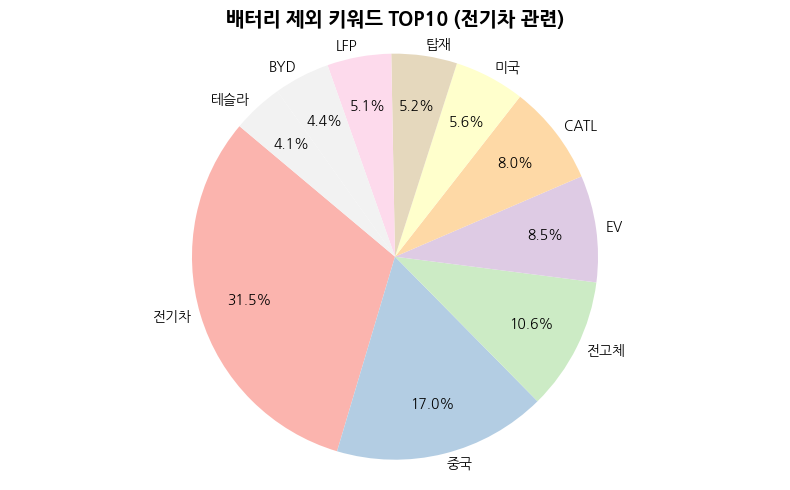

In [33]:
battery_titles = [t for t in titles if ("배터리" in str(t))]
# ================================
# '배터리' 제외 후 TOP10 추출
# ================================

battery_words_wo = [w for w in battery_words if w != "배터리"]
battery_counter = Counter(battery_words_wo)
battery_top10 = battery_counter.most_common(10)

df_battery = pd.DataFrame(battery_top10, columns=["단어", "빈도"])

# ================================
# 파이 그래프 만들기
# ================================

plt.figure(figsize=(8, 5))

colors = plt.cm.Pastel1(range(10))   # 파스텔톤 색상

plt.pie(
    df_battery["빈도"],
    labels=df_battery["단어"],
    autopct="%.1f%%",
    startangle=140,
    colors=colors,
    pctdistance=0.75,    # 숫자 위치 조정
    labeldistance=1.05   # 라벨 간격 조정
)

plt.title("배터리 제외 키워드 TOP10 (전기차 관련)", fontsize=14, fontweight='bold')
plt.axis("equal")
plt.tight_layout()
plt.show()